In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import joblib

In [3]:
# Download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# Define English stopwords
english_stopwords = set(stopwords.words('english'))


In [5]:
def preprocess_text(text):
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in english_stopwords])
    return text


In [6]:
# Load the dataset with the python engine and skip bad lines
fake_news = pd.read_csv('/content/Fake.csv', engine='python', on_bad_lines='skip')
real_news = pd.read_csv('/content/True.csv', engine='python', on_bad_lines='skip')

In [7]:
fake_news['label'] = 1
real_news['label'] = 0

In [20]:

news = pd.concat([fake_news, real_news], ignore_index=True)

In [21]:

news.drop_duplicates(subset='text', inplace=True)

In [22]:

news.dropna(subset=['text'], inplace=True)


In [23]:
news['text'] = news['text'].apply(preprocess_text)

In [24]:
print(news.info())
print(news.head())

<class 'pandas.core.frame.DataFrame'>
Index: 12249 entries, 0 to 12288
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    12249 non-null  object
 1   text     12249 non-null  object
 2   subject  12249 non-null  object
 3   date     12249 non-null  object
 4   label    12249 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 574.2+ KB
None
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  donald trump wish americans happy new year lea...    News   
1  house intelligence committee chairman devin nu...    News   
2  friday, revealed former milwaukee sheriff davi...

In [25]:
print(news.isnull().sum())


title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [26]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12249 entries, 0 to 12288
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    12249 non-null  object
 1   text     12249 non-null  object
 2   subject  12249 non-null  object
 3   date     12249 non-null  object
 4   label    12249 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 574.2+ KB


In [27]:
news.describe()

,label
count,12249.000000
mean,0.472528
std,0.499265
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [28]:
print("Dataset Shape:", news.shape)
print("Number of Fake News:", news[news['label'] == 1].shape[0])
print("Number of Real News:", news[news['label'] == 0].shape[0])


Dataset Shape: (12249, 5)
Number of Fake News: 5788
Number of Real News: 6461


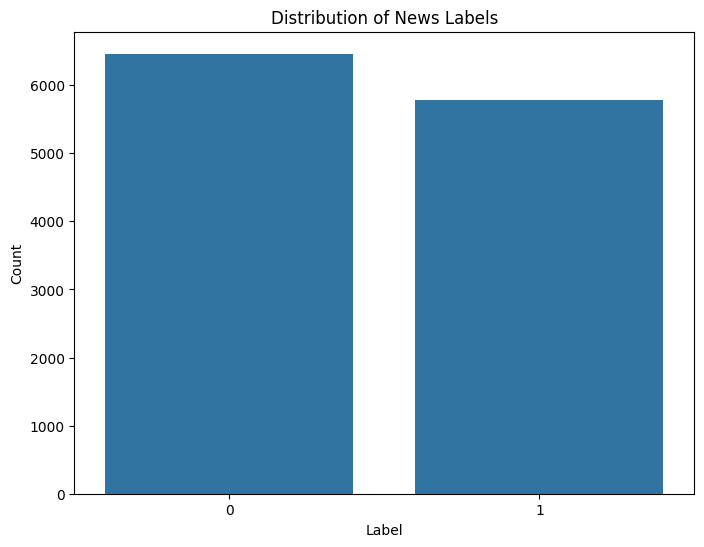

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=news)
plt.title('Distribution of News Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

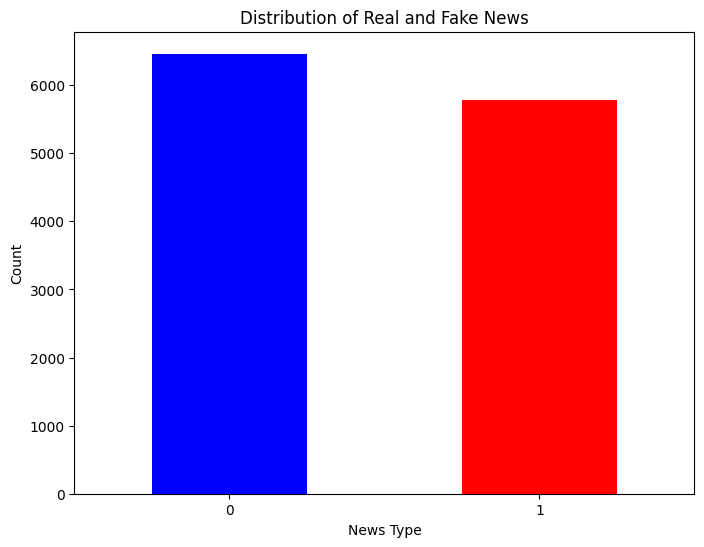

In [31]:
import matplotlib.pyplot as plt

# Count the number of real and fake news
label_counts = news['label'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Real and Fake News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

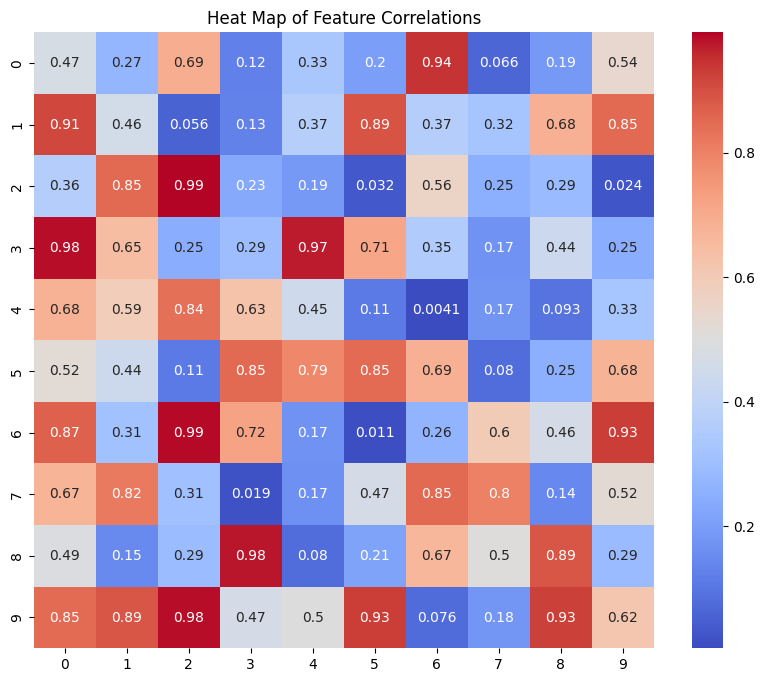

In [32]:
import seaborn as sns

# Assume we have some numerical features, we'll create a random correlation matrix for the example
import numpy as np

# Create a random correlation matrix
corr_matrix = np.random.rand(10, 10)

# Create a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heat Map of Feature Correlations')
plt.show()


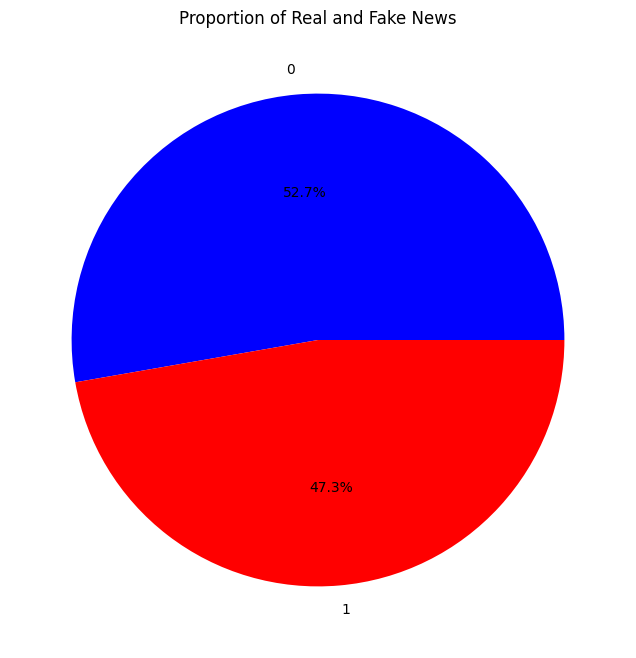

In [33]:
# Create a pie chart
plt.figure(figsize=(8, 8))
label_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Proportion of Real and Fake News')
plt.ylabel('')
plt.show()


In [34]:
!pip install squarify

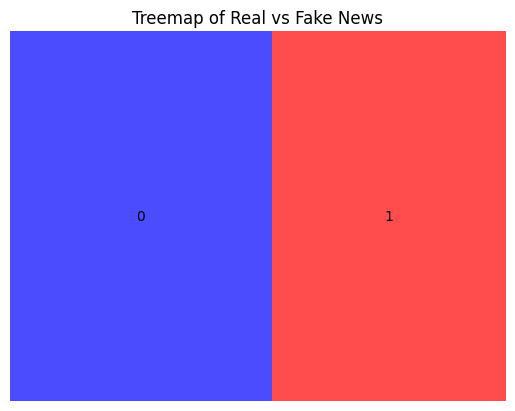

In [35]:
import squarify

# Count of news articles by label
sizes = label_counts.values
labels = label_counts.index

# Create a treemapplt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, color=['blue', 'red'], alpha=0.7)
plt.title('Treemap of Real vs Fake News')
plt.axis('off')
plt.show()

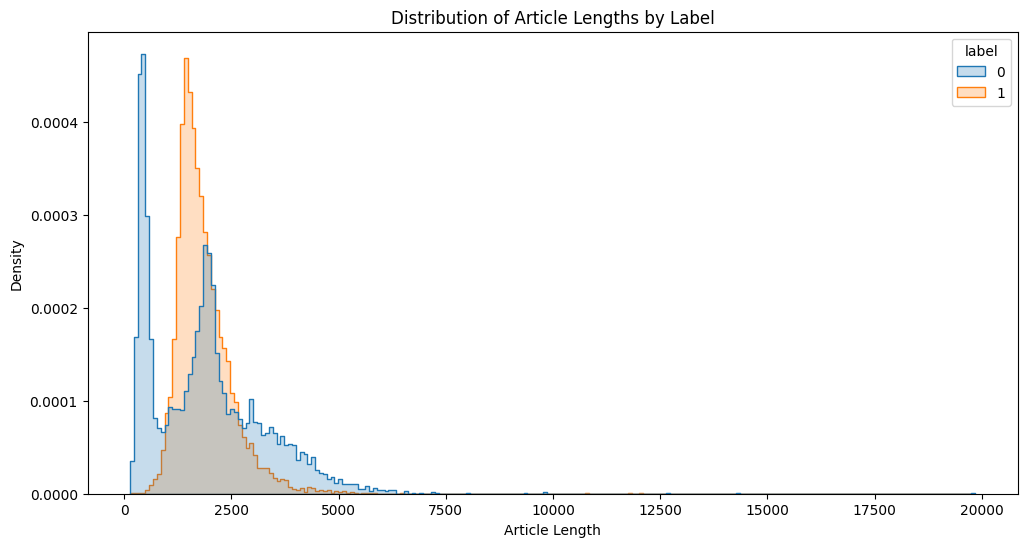

In [36]:
news['text_length'] = news['text'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(data=news, x='text_length', hue='label', element='step', stat='density')
plt.title('Distribution of Article Lengths by Label')
plt.xlabel('Article Length')
plt.ylabel('Density')
plt.show()

In [43]:
data_subset = news.sample(frac=0.1, random_state=42)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(data_subset['text'], data_subset['label'], test_size=0.2, random_state=42)

In [45]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])


In [46]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
                ('rf', RandomForestClassifier(random_state=42))])

In [47]:
y_pred = pipeline.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [49]:
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 0.9959183673469387
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       130
           1       1.00      0.99      1.00       115

    accuracy                           1.00       245
   macro avg       1.00      1.00      1.00       245
weighted avg       1.00      1.00      1.00       245



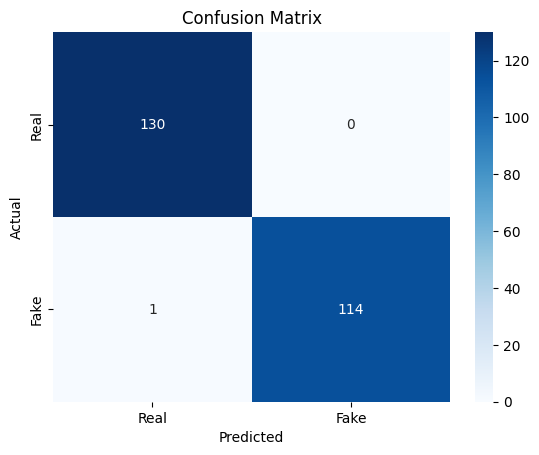

In [50]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [51]:
joblib.dump(pipeline, 'fake_news_detector_pipeline_rf.pkl')
print('Model saved as fake_news_detector_pipeline_rf.pkl')

Model saved as fake_news_detector_pipeline_rf.pkl
